In [1]:
#importing all the python libraries that i need

#import numpy,i need it to generate data for visualization and for computation
import numpy as np

#i import pandas for data anlysis and manipulations
import pandas as pd

#matplotlib library for plotting 2D graphics
import matplotlib.pyplot as plt

#scipy.stats library for statistical functions
import scipy.stats

from sklearn.model_selection import train_test_split
#for encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

from math import sqrt

#for spatial algorithm and data structures
from scipy import spatial

#for distance computations
from scipy.spatial import distance
import seaborn as sns
#
import itertools

# System
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Processing

# importing the 'load_dataset_module2' that I created to import the 'loaddataset class' with the 3 METHODS for loading the dataset into this PYTHON NOTE

In [2]:
#importing the book ratings dataframe from the load_dataset module i created
from load_dataset_module2 import loaddataset

#calling the loaddataset class from the module
f = loaddataset('ratings', 'books', 'users')



# calling the book_rating method of the loaddataset object to load the book rating dataframe

In [3]:
#calling the book_rating method of the loaddataset object to load the book rating dataframe
ratings= f.get_book_ratings()

ratings

,user_id,book_id,bookrating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


# shape of the book rating dataframe:

In [4]:
#shape of the book rating dataframe
ratings.shape


(1149780, 3)

In [5]:
ratings['book_id'].nunique()

340556

# Ratings distribution

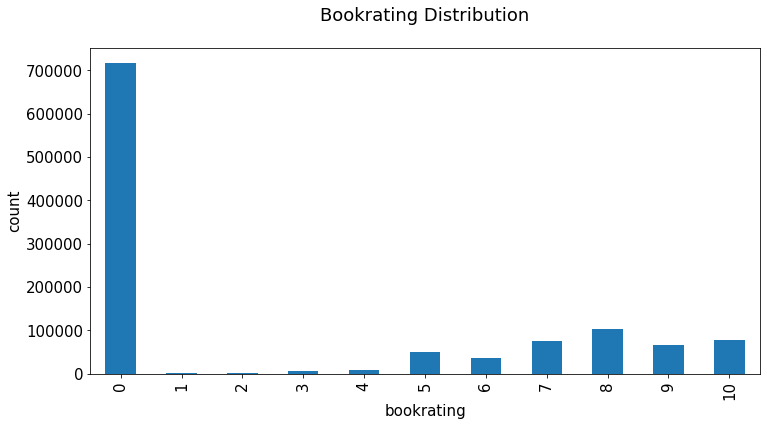

In [6]:
#ignoring 0 rating
#DATA['bookrating'] = DATA['bookrating'].replace(0, None)


plt.rc('font', size=15)
ratings.bookrating.value_counts(sort=False).plot(kind='bar', figsize = (12,6))
plt.title('Bookrating Distribution\n')
plt.xlabel('bookrating')
plt.ylabel('count')
plt.show()

#The ratings are very unevenly distributed, and the majority of ratings are 0.

# calling the users method of the loaddataset object to load the users dataframe from the load_dataset module

In [7]:
#calling the users method of the loaddataset object to load the users dataframe from the load_dataset module
users = f.get_userid()
users

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


# shape of the users dataset

In [8]:
#shape of the users dataset
users.shape

(278858, 3)

# Age distribution

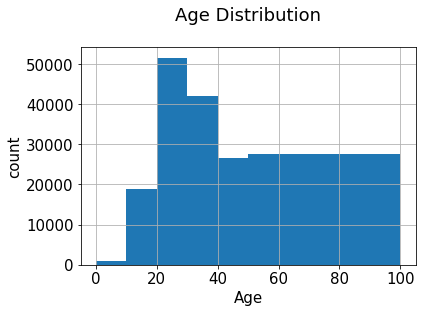

In [9]:
#plt.rc('font', size=15)
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100] )
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

#The most active users are among those in their 20–30s.

In [10]:
#calling the books method of the loaddataset object to load the books dataframe
books = f.get_books()
books

,book_id,booktitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [11]:
#shape of the books dataframe
books.shape

(271360, 8)

# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [12]:
counts1 = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookrating'].value_counts()
ratings = ratings[ratings['bookrating'].isin(counts[counts >= 100].index)]

# Rating matrix: converting the ratings table to a 2Dimensional matrix. The matrix will be sparse because not every user rated every book.

In [13]:
ratings_pivot = ratings.pivot(index='user_id', columns='book_id').bookrating
user_id = ratings_pivot.index
book_id = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


book_id,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
books.columns

Index(['book_id', 'booktitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [15]:
#Starting from the original data set, i will be only looking at the popular books.
#In order to find out which books are popular, i merge books dataframe with ratings dataframe.       
merged_book_with_rating = pd.merge(ratings, books, on='book_id')
columns = [ 'bookAuthor', 'yearOfPublication', 'publisher','imageUrlS', 'imageUrlM', 'imageUrlL']
merged_book_with_rating = merged_book_with_rating.drop(columns, axis=1)
merged_book_with_rating.head()

,user_id,book_id,bookrating,booktitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


# i then group by title and create a column for total rating count

In [16]:

merge_book_with_rating = merged_book_with_rating.dropna(axis = 0, subset = ['booktitle'])
book_ratingCount = (merged_book_with_rating.groupby(by = ['booktitle'])['bookrating'].count().reset_index().rename(columns = {'bookrating': 'totalRatingCount'})[['booktitle', 'totalRatingCount']])
book_ratingCount.head()

,booktitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


# i merged the rating dataset with the book rating count data, this gives me exactly what i need to find out which books are popular and filter out lesser known books.

In [17]:
         
bookrating_with_totalRatingCount = merged_book_with_rating.merge(book_ratingCount, left_on = 'booktitle', right_on = 'booktitle', how = 'left')
bookrating_with_totalRatingCount.head()

,user_id,book_id,bookrating,booktitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


# now i want to look at the statistics of  total rating count:

In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


# Because there are so many books in the dataset, i will limit it to the top 1%, because if i dont do this, it will take a very long time to bring output or may cause of memory error on 8 GB Laptop and i am using 8 GB Laptop for this course work

In [19]:
#considering only popular books, books with less than 50 ratings are excluded


popularity_threshold = 50
rating_popular_book = bookrating_with_totalRatingCount.query('totalRatingCount>=@popularity_threshold')
rating_popular_book.head()

,user_id,book_id,bookrating,booktitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [20]:
rating_popular_book.shape

(62149, 5)

# checking the size of the dataset

In [21]:
print(' the size of the dataset is: ', rating_popular_book.memory_usage().sum() / 1024**2, ' MB')

 the size of the dataset is:  2.8449554443359375  MB


# checking information of the dataframe

In [22]:
rating_popular_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62149 entries, 0 to 488715
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           62149 non-null  int64 
 1   book_id           62149 non-null  object
 2   bookrating        62149 non-null  int64 
 3   booktitle         62149 non-null  object
 4   totalRatingCount  62149 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.8+ MB


# checking for the numbers of bookid in the data

In [23]:
print('Number of books is :\n ', rating_popular_book['book_id'].nunique())

Number of books is :
  2259


# checking for numbers of users in the data

In [24]:
print('the Number of users is: \n ',rating_popular_book['user_id'].nunique())

the Number of users is: 
  894


# checking for missing values

In [25]:
print('Missing data %')
round(rating_popular_book.isnull().sum() / len(rating_popular_book * 100), 6)

Missing data %


user_id            0.000
book_id            0.000
bookrating         0.000
booktitle          0.000
totalRatingCount   0.000
dtype: float64

# checking for average book rating

In [26]:
print('the Average book rating is:\n ', round(rating_popular_book['bookrating'].mean(), 4))

the Average book rating is:
  2.0094


# now i change the name of the dataframe for easy understanding

In [27]:
#changing the name of the dataframe for easy understanding

df_users = rating_popular_book
df_users.head()

,user_id,book_id,bookrating,booktitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


# checking the shape of the dataframe

In [28]:
df_users.shape

(62149, 5)

In [29]:
#df["bookRating"] = pd.to_numeric(df["bookRating"], downcast="float")
df_users.head()

,user_id,book_id,bookrating,booktitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


# looking at the statistics of total rating count

In [30]:


pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(df_users['totalRatingCount'].describe())

count   62149.000
mean      100.925
std        52.111
min        50.000
25%        63.000
50%        83.000
75%       121.000
max       365.000
Name: totalRatingCount, dtype: float64


# descriptive statistics of  dataframe:

In [31]:
df_users.describe()

,user_id,bookrating,totalRatingCount
count,62149.000,62149.000,62149.000
mean,140629.149,2.009,100.925
std,80793.838,3.567,52.111
min,254.000,0.000,50.000
25%,69971.000,0.000,63.000
50%,140036.000,0.000,83.000
75%,212923.000,3.000,121.000
max,278418.000,10.000,365.000


# droping the rows with the missing values

In [32]:
df_users.dropna(axis=0)


,user_id,book_id,bookrating,booktitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
...,...,...,...,...,...
487016,269566,0670809381,0,Echoes,54
487544,271284,0440910927,0,The Rainmaker,180
487796,271705,B0001PIOX4,0,Fahrenheit 451,119
488402,274808,0449701913,0,Homecoming,61


# Filling missing values with 0

In [33]:
#Filling missing values with 0
df_users.fillna(0)

,user_id,book_id,bookrating,booktitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
...,...,...,...,...,...
487016,269566,0670809381,0,Echoes,54
487544,271284,0440910927,0,The Rainmaker,180
487796,271705,B0001PIOX4,0,Fahrenheit 451,119
488402,274808,0449701913,0,Homecoming,61


In [34]:
df_users['user_id'].unique

<bound method Series.unique of 0         277427
1           3363
2          11676
3          12538
4          13552
           ...  
487016    269566
487544    271284
487796    271705
488402    274808
488715    275970
Name: user_id, Length: 62149, dtype: int64>

In [35]:
#combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

#us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
#us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
#us_canada_user_rating.head()

# THE 7 SIMILARITY METRICES FORMULARS:

THE 7 SIMILARITY METRICES FORMULARS:
    
    

1. the minkowski distance similarity formular is, m(x,y) =      $(\sum|x - y|^p)^1/p$


2. the squared euclidean formula, D(x,y) =                       ∑(𝑥−𝑦)2


3. spearman's rank correlation, p(x,y) =                         $1 - 6 \sum(d)^2/n(n^2 - 1)$


4. chebyshev =                                                 $max(| x - y|)$


5. hamming distance


6. cosine similarity =                                          $\sum xy / \sqrt \sum x^2  \sqrt \sum y^2$


7. pearson correlation similarity:     $\sum XY - ((\sum X)(\sum Y)/n)/ \sqrt \sum X^2 - ((\sum X)/n)(\sum Y^2 - (\sum Y)^2/n)$

In [40]:
from math import sqrt
#Define the similarity class
class similarity:
    # Initializer method for initializing objects of the class similarity
    def __init__(self, prefs):
        self.prefs = prefs
        self.s1 = []
        self.s2 = []
        
        
        
    # A method that Returns the minkowski distance similarity for user1 and user2:
    def minkowski_distance_similarity(self,user1, user2):
        #exception handling:
        try:
            #defining the parameters of the method of the class
            self.user1 = user1
            self.user2 = user2
            
            # Count of books read by both users
            b_r = 0
            
            #user input for p value for minkowski similarity
            p_value = int(input('please enter the p-value for the minkowski similarity between user1 and user2 : \n'))
            
            #condition that the two users rated common books
            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    
                    #retrieving rating scores to the common books that user1 and user2 rated into an empty list
                    #i initiated in the __init__function
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1), 'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r += 1
            
            #condition if there is no common book/s rated by the two users, return 0
            if b_r==0:
                return 0
            
            #computing the minkowski distance formula
            m = (sum(pow(abs(a-b), p_value) for a, b in zip(self.s1, self.s2))**1/p_value)
            
            #condition for zero division
            if m==0:
                return 0
            
            #rounding the result to 6 decimal places
            return round(1/m, 6)
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except ValueError:
            print("Wrong input for p_value, p_value must be real numbers.")
       # except:
            #print("Some other exception happened.")
            
            
     # method that Returns the squared euclidean similarity for user1 and user2:
    def squared_euclidean_similarity(self,user1, user2):
        # exceptions handling
        try:
            self.user1 = user1
            self.user2 = user2
            
            # To get both rated books by user1 and user2
            b_r = {}

            #condition that the two users rated common books
            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    
                    #retrieving rating scores to the common books that user1 and user2 rated into an empty list
                    #i initiated in the __init__method
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1), 'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r[book] = 1
            
            #condition if there is no common book/s rated by the two users, return 0
            if len(b_r)==0:
                return 0
            

            
            #computing the squared euclidean distance formula
            s_euc = (sum(pow(a-b,2) for a, b in zip(self.s1, self.s2)))
            
            ##condition for zero division
            if s_euc == 0:
                return 0
            
            return (1/s_euc)
        
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except ValueError:
            print("there is wrong input of value, please revisit your input")
        except:
            print("Some other exception happened, please check your inputs.")
            
            
    # method that Returns the spearman correlation similarity for user1 and user2:
    def spearman_correlation_similarity(self, user1, user2):
        #handling exceptions
        try:

            self.user1 = user1
            self.user2 = user2
            
            
            # To get both rated books by user1 and user2
            b_r = {}

            #condition that the two users rated common books
            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    
                    #retrieving rating scores to the common books that user1 and user2 rated into an empty list
                    #i initiated in the __init__method
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1), 'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r[book] = 1
            
            #condition if there is no common book/s rated by the two users, return 0
            if len(b_r)==0:
                return 0
            
            # here i use python library to find the spearman correlation between the rating scores of user1 and user2
            #which i retrieved as a vector. i change slightly what i did in assignment1 because this time i am allow to import 
            #libraries and use and this also speed my program
            R = scipy.stats.spearmanr(self.s1, self.s2)
            return R[0]
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except ValueError:
            print("there is wrong input of value, please revisit your input")
        except:
            print("Some other exception happened, please check your inputs.")
            
            
    def chebyshev_similarity(self, user1, user2):
        #handling exceptions
        try:
            #defining the parameters of the object of the class 'similarity'

            self.user1 = user1
            self.user2 = user2
            
            # To get both rated books by user1 and user2
            b_r = {}
            distance = []

            #condition that the two users rated common books
            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    
                    ##retrieving rating scores to the common books that user1 and user2 rated into an empty list
                    #i initiated in the __init__method
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1), 'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r[book] = 1
            
            #condition if there is no common book/s rated by the two users, return 0
            if len(b_r)==0:
                return 0
            
            
            ##computing the chebyshev distance formula
            for a, b in zip(self.s1, self.s2):
                distance.append(abs(a-b))
                C = max(distance)
                return round(1/C, 2)
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except NameError :
            print('there is a name in the function that is not defined, please check to fix this')
        except ValueError:
            print("Wrong input of value, please check")
        except:
            print("Some other exception happened.")
            
            
    # method that Returns the hamming distance similarity for user1 and user2:
    def hamming_distance_similarity(self, user1, user2):
        #handling exceptions
        try:
            #defining the parameters of the object of the class
            
            self.user1 = user1
            self.user2 = user2
            
            
            # To get both rated books by user1 and user2
            b_r = {}
            

            #condition that the two users rated common books
            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    
                    ##retrieving rating scores to the common books that user1 and user2 rated into an empty list
                    #i initiated in the __init__method
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1),'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r[book] = 1
            if len(b_r)==0:
                return 0
            

            
            # here again i use python library to find the hamming distance between the rating scores of user1 and user2
            #which i retrieved as a vector. i change slightly what i did in assignment1 because this time i am allow to import 
            #libraries and use and this also speed my program
            H = scipy.spatial.distance.hamming(self.s1, self.s2) *len(self.s1)
            return 1/H         
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        #except NameError :
            print('there is a name in the function that is not defined, please check to fix this')
        #except ValueError:
            print("Wrong input of value, please check")
        #except:
            #print("Some other exception happened.")
            
            
            
    def cosine_similarity(self, user1, user2):
        #handling exceptions
        try:
            #self.prefs = prefs
            self.user1 = user1
            self.user2 = user2
            
            # To get both rated books by user1 and user2
            b_r = {}
            #H = 0

            #condition that the two users rated common books
            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    
                    #retrieving rating scores to the common books that user1 and user2 rated into an empty list
                    #i initiated in the __init__method
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1), 'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r[book] = 1
            if len(b_r)==0:
                return 0
            
            # also here i use python library to find the cosine distance between the rating scores of user1 and user2
            #which i retrieved as a vector. i change slightly what i did in assignment1 because this time i am allow to import 
            #libraries and use and this also speed my program
            C = 1 - spatial.distance.cosine(self.s1,self.s2)
            return C
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except NameError :
            print('there is a name in the function that is not defined, please check to fix this')
        except ValueError:
            print("Wrong input of value, please check")
        #except:
           # print("Some other exception happened.")
            
            
    def pearson_correlation(self, user1, user2):
        
        #handling exceptions
        try:
            self.user1 = user1
            self.user2 = user2
            # To get both rated books by user1 and user2
            b_r = {}
            #H = 0

            for book in self.prefs.loc[self.prefs.user_id==self.user1, 'book_id'].tolist():
                if book in self.prefs.loc[self.prefs.user_id==self.user2, 'book_id'].tolist():
                    self.s1.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user1), 'bookrating'].iloc[0])
                    self.s2.append(self.prefs.loc[(self.prefs.book_id==book) & (self.prefs.user_id==self.user2), 'bookrating'].iloc[0])
                    b_r[book] = 1
            if len(b_r)==0:
                return 0

            
            #also here i use python library to find the cosine distance between the rating scores of user1 and user2
            #which i retrieved as a vector. i change slightly what i did in assignment1 because this time i am allow to import 
            #libraries and use and this also speed my program
            P = scipy.stats.pearsonr(self.s1, self.s2)[0]
            return P
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except NameError :
            print('there is a name in the function that is not defined, please check to fix this')
        except ValueError:
            print("Wrong input of value, please check")
        except:
            print("Some other exception happened.")
            
            
            
    #Ranking similar users for a user:
    def n_similar_users(self,user, number_of_users, metric=['cosine', 'pearson', 'spearson', 'hamming', 'euclidean', 'chebyshev']):
        try:
            
            
            self.user = user
            self.number_of_users = number_of_users
            metric = input('please enter the first two letters of the similarity metrix to use and compute the similarity between a user and the nth users : \n').lower().strip()
        
            # Getting distinct user ids:
            user_ids = self.prefs.user_id.unique().tolist()
        
            # Getting similarity score between targeted and every other suer in the list(or subset of the list).

            if(metric == 'co'):
                similarity_score = [(self.cosine_similarity(self.user,nth_user),nth_user) for nth_user in user_ids if nth_user!=self.user]
            
            #condition to use pearson correlation similarity method
            elif(metric == 'pe'):
                similarity_score = [(self.pearson_correlation(self.user,nth_user),nth_user) for nth_user in user_ids if nth_user!=self.user]
            
            #condition to use spearman correlation similarity method
            elif (metric == 'sp'):
                similarity_score = [(self.spearman_correlation_similarity(self.user,nth_user),nth_user) for nth_user in user_ids if nth_user!=self.user]

            #condition to use hamming distance similarity
            elif(metric == 'ha'):
                similarity_score = [(self.hamming_distance_similarity(self.user,nth_user),nth_user) for nth_user in user_ids if nth_user!=self.user]
            
            #condition to use chebyshev similarity method
            elif(metric == 'ch'):
                similarity_score = [(self.chebyshev_similarity(self.user,nth_user),nth_user) for nth_user in user_ids if nth_user!=self.user]
            
            #condition to use squared euclideans similarity if the use input wrong specification of the metrice to use
            else:
                similarity_score = [(self.squared_euclidean_similarity(self.user,nth_user),nth_user) for nth_user in user_ids if nth_user!=self.user]
            
        
        
            #Sorting in descending order.
            similarity_score.sort()
            similarity_score.reverse()
    
              # Returning the top most 'number_of_users' similar users. 
            return similarity_score[0:self.number_of_users]
        
        
        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        #except NameError :
            #print('there is a name in the function that is not defined, please check to fix this')
        except ValueError:
            print("Wrong input of value, please check")
        #except:
            #print("Some other exception happened.")
            
            
    def recommendation_to_target_user(self, userid, n_recomm_for_user):
        #handling exception
        try:
            
            #self.prefs = prefs
            self.n_recomm_for_user = n_recomm_for_user
            self.userid = userid
            user_ids = self.prefs.user_id.unique().tolist()
            total = {}
            similarity_sum = {}
            
            
            # Iterating over subset of userids:
            for user in user_ids[:100]:
                
                # not comparing the user to itself
                if user==userid:
                    continue
                
                # Getting similarity score between the users.
                score = self.cosine_similarity(userid, user)
                
                # not considering users having zero or less similarity score
                if score<=0:
                    continue
                
                # Getting weighted similarity score and sum of similarities between both the users
                for bookid in self.prefs.loc[self.prefs.user_id==user, 'book_id'].tolist():
                    
                    # Only considering not read/rated books
                    if bookid not in self.prefs.loc[self.prefs.user_id==userid, 'book_id'].tolist() or self.prefs.loc[(self.prefs.book_id==bookid) & (self.prefs.user_id==self.userid), 'bookrating'].tolist()==0:
                      
                        total[bookid]=0
                        total[bookid]+=(self.prefs.loc[(self.prefs.book_id==bookid) & (self.prefs.user_id==user), 'bookrating'].iloc[0])*score
                        similarity_sum[bookid] = 0
                        similarity_sum[bookid] +=score
                        
                #Normalizing ratings
                ranking = [(tot/similarity_sum[bookid],bookid) for bookid, tot in total.items()]
                ranking.sort()
                ranking.reverse()
                recommendataions_list = [(self.prefs.loc[self.prefs.book_id==book,  'booktitle'].iloc[0])  for score,book in ranking]
                return recommendataions_list[:n_recomm_for_user]

        except KeyError:
            print('wrong user ID number, please enter the correct user ID')
        except UnboundLocalError:
            print('a local variable is referenced before assignment, please check your variables and try again')
        except NameError :
            print('there is a name in the function that is not defined, please check to fix this')
        except ValueError:
            print("Wrong input of value, please check")
        except:
            print("Some other exception happened.")                                                                                                       

In [60]:
d = similarity(df_users)
s = d.chebyshev_similarity(277427, 13552)
s

0.1

In [61]:
d = similarity(df_users)
s = d.recommendation_to_target_user(277427, 5)
s

["The Color of Water: A Black Man's Tribute to His White Mother",
 'Wuthering Heights',
 "The Lost Boy: A Foster Child's Search for the Love of a Family",
 "Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))",
 'Remember Me']

# implementation of my similarity class 

In [42]:
#s = similarity()

def main_1():
    #exception handling
    try:
        #calling the similarity class
        s = similarity(df_users)
        
        #specifying the operation the user want to perform on each of the class methods
        choice = int(input('please enter 1 to compute similarity between two users, 2 for similarity between a user and nth users and 3 for recommendation to a target user : '))
        
        #condition for similarity between two users
        if(choice == 1):
            user1 = int(input('please enter the first userID number : '))   # recieve input from users
            user2 = int(input('please enter the second user ID number : '))
            metric = input('please enter the first two letters of the similarity metrix you want to use to compute similarity between the two users: \n').lower().strip()
            
            #invoking the minkowski method of the class to find similarity between two users
            if(metric == 'mi'):
                print('the minkowski similarity between', user1, 'and', user2, 'is : \n', s.minkowski_distance_similarity(user1, user2))
            
            #invoking the squared_euclidean_similarity of the class to find similarity between two users
            elif(metric == 'se'):
                print('the squared euclidean similarity between', user1, 'and', user2, 'is : \n', s.squared_euclidean_similarity(user1, user2))
            elif(metric == 'sp'):
                print('the spearman correlation similarity between', user1, 'and', user2, 'is : \n', s.spearman_correlation_similarity(user1, user2))
            
            #invoking the chebyshev_similarity of the class to find similarity between two user
            elif(metric == 'ch'):
                print('the chebyshev similarity between', user1, 'and', user2, 'is : \n', s.chebyshev_similarity(user1, user2))
            
            #invoking the hamming_distance_similarity of the class to find similarity between two user
            elif(metric == 'ha'):
                print('the hamming similarity between', user1, 'and', user2, 'is : \n', s.hamming_distance_similarity(user1, user2))
            
            #invoking the cosine_similarity of the class to find similarity between two user
            elif(metric == 'co'):
                print('the cosine similarity between', user1, 'and', user2, 'is : \n', s.cosine_similarity( user1, user2))
            
            #invoking the pearson_correlation of the class to find similarity between two user
            else:
                print('the pearson correlation similarity between', user1, 'and', user2, 'is : \n', s.pearson_correlation(user1, user2))
        
        #condition to find similarity between a user and the nth users
        elif(choice == 2):
            user = int(input('please enter a userID to compute the similarity between the nth users : '))
            number_of_users = int(input('please enter the number of the nth users to compute similarity against : \n'))
            print('the similarity between ', user, 'and top',  number_of_users, 'other users', 'are :\n ', s.n_similar_users(user, number_of_users))
            
        #condition to make n recommendation to a target user
        elif(choice == 3):
            userid = int(input('please enter the userid to recommend books to :\n '))
            n_recom_for_user = int(input('please enter the number of books you want to recommend to this user: \n'))
            print('the', [n_recom_for_user], 'recommendation for the user with this ID ', [userid], 'base on the knn is :\n ', s.recommendation_to_target_user(userid, n_recom_for_user))
            
        else:
                print('the pearson correlation similarity between', user1, 'and', user2, 'is : \n', s.pearson_correlation(user1, user2))
            
        
            
    except KeyError:
        print('wrong user ID number, please enter the correct user ID')
    except ValueError:
        print('input for what you want to do and number of recommendation can only be integer values, please check and try again')
    except:
        print("Some other exception happened.")
    
main_1()

please enter 1 to compute similarity between two users, 2 for similarity between a user and nth users and 3 for recommendation to a target user : 3
please enter the userid to recommend books to :
 277427
please enter the number of books you want to recommend to this user: 
5
the [5] recommendation for the user with this ID  [277427] base on the knn is :
  ["The Color of Water: A Black Man's Tribute to His White Mother", 'Wuthering Heights', "The Lost Boy: A Foster Child's Search for the Love of a Family", "Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))", 'Remember Me']
